In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 3EFF-E384

 Directory of c:\Users\ppapa\OneDrive\����������\MSC\semester B\Python\lecture9_clustering

04/29/2025  06:34 PM    <DIR>          .
04/25/2025  02:03 PM    <DIR>          ..
04/29/2025  06:35 PM         1,603,035 lecture_09a_kmeans_clustering.ipynb
04/29/2025  06:33 PM         2,216,856 lecture_09b_kmeans_centroids_initialization.ipynb
04/29/2025  06:33 PM             1,452 lecture_09c_other_clustering_algos.ipynb
04/29/2025  06:32 PM         4,667,327 three_dim_customers.html
               4 File(s)      8,488,670 bytes
               2 Dir(s)  145,331,478,528 bytes free


In [2]:
import pandas as pd

### Guess the correct location of the data file from the code below

In [3]:
# datafile = pd.read_csv("mall_customers.csv")

# datafile = pd.read_csv("data/mall_customers.csv")

# datafile = pd.read_csv("../../data/mall_customers.csv")

# datafile = pd.read_csv("/home/tharg/venv_projects/uoa_py_course/lectures_ipynb_files/lecture_09_clustering/mall_customers.csv")

# datafile = pd.read_csv("../data/mall_customers.csv")

# Lecture 09a. Clustering. `KMeans` implementation from `scikit-learn`.

**Definitions**

* Algorithm:
* Cluster:
* Unsupervised learning:


Introduction to `Kmeans` by [my favourite tutor.](https://www.youtube.com/watch?v=lQ39ZRFfYbI)

`KMeans` is an "unsupervised learning" algorithm → We don't know the labels. We assign intuitive labels according to the data.   
We don't have a "y" target variable that we want to predict.  

The goal is to create K groups (clusters) of homogeneous observations.   
The number K of groups is unknown. The labels of the groups are unknown.  
A more accurate description could be "unlabelled learning".

Using what the data suggest, we chose the number of groups, and then we think of appropriate and intuitive labels to describe each cluster (group).     

Centroids: the centre of the cluster. Maybe an actual observation in the data or not.  

Measuring success:   
a) minimise the total distance of all observations from the centroid. This metric is called "inertia" or "**Within Cluster Sum of Squares (WCSS)**",    
b) maximise cluster "cohesion", how  similar are the observations in a cluster compared to other clusters (Silhouette Score).   
c) for all available metrics on scikit-learn please read the relevant section.  

Important note:   
The number of groups (clusters) in social sciences is in many cases a matter of policy, a strategic decision based on possible insights of the data.   
It depends on how much we want to "zoom out" or "zoom in" the data - argythana(tm).      
The number of clusters in positive science is in most cases predetermined. E.g. Fraud, Measurement error.

We may examine and report about the data for different numbers of clusters depending on our needs.   
In most cases, we start from 2 clusters and increase K up to a reasonable point.    
Often, there is no "correct" number of clusters.  

Actually, "unsupervised" learning ["is supervised"](https://www.youtube.com/watch?v=JbP9EPPvVXg) to an extent.   
I would add that clustering is similar to classification of observation to "unknown classes".  
These new "classes" can in turn be labelled according to users needs.  

Clustering can be thought of as trying to "classify" to unknown classes, when we don't know the classed of the observations.  

In [4]:
# Uncomment the line below to read the documentation about KMeans.
# KMeans?

# Detailed tutorial on Kmeans from kaggle, improvements, additions by Thanasis Argyriou.
[Tutorial from kaggle](https://www.kaggle.com/satishgunjal/tutorial-k-means-clustering)

## The mall customers dataset, loaded from csv file on your disk.
[Source of the data is Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

[Info about dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)  

In [5]:
# use pwd command to see in which folder we are working in.
# pwd means present working directory
# you may need !pwd in Mac OS

In [6]:
pwd

'c:\\Users\\ppapa\\OneDrive\\Υπολογιστής\\MSC\\semester B\\Python\\lecture9_clustering'

## 1. Import the necessary modules.   
 Adding libraries here for presentation purposes. As a best practice all imports should be at the first code cell.

In [7]:
# data management libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# interactive visualizarion libaries
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# scikit learn clustering library
from sklearn.cluster import KMeans
# import the silhouette metric
from sklearn.metrics import silhouette_samples, silhouette_score

## 2. Load the data using the correct path 

In [8]:
# If your notebook is in the same folder as the data file just use the files name.
df = pd.read_csv("../datasets/mall_customers.csv")

In [9]:
# If you data is inside a folder called data, two folders above your current working folder:
# You get extra points for that and is mandattory for the assignment

# df = pd.read_csv("../../data/mall_customers.csv")

# Or use an absolute path, that is too ugly, and will NOT work for you because you a different user. You are not tharg.
#d f = pd.read_csv("C:\\Users\\tharg\\uoa_py_course\\data\\mall_customers.csv")

### Understand the data features.   
See which are the variables, what is their type, what are the values that the variables take.  
At this step, you should think about possible relations that you ought to examine.   
Which do you think might be more important?

In [10]:
# show first 4 lines of dataset
df.head(4)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [11]:
# show column names of dataset.
# 5 columns with suboptimal names.
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [12]:
# show data types of dataset.
# four numeric, one categorical variable type.
df.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [13]:
# simple commnand to show column names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Short summary notes about the variables.
CustomerID is not important, unless you know who is who.  

Spending score is what makes a huge difference. How could we group the customers, according to their spending score, gender, income, age?   

The second most important variable, in this case, should be annual income.  

Gender might, or might might not make a difference.  

Age is a tricky variable. Depending in the issue in question, it might be in linear correlation with the other variables, or it might grow and then gradually fall in importance. e.g. The possibility of deseases and age should be correlated and should grow as age grows. On the other hand, income could grow as age grows but then, after retirement, as age grows income might fall. The same line of thought might apply to age and spending score.   

Conclusion, we want to group customers in clusters. We examine the variables and their relationships. Finally, we separate the customes in clusters.

## 3. Descriptive statistics and Exploratory Data Analysis (EDA)

### 3.1. Descriptive Statistics

In [14]:
# get rid of customer ID column, useless in this case.
df = df.drop("CustomerID", axis=1)

In [15]:
# very basic DStats
df.describe()  # show only numeric variables

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [16]:
# df.describe(include='all')

In [17]:
# Descriptive stats for categorical variables.
df.describe(include=object)

# alternative way to desribe one single column.
#df.Genre.describe()

,Genre
count,200
unique,2
top,Female
freq,112


In [18]:
# count number of observations in Genre column.
df.Genre.value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [19]:
# count number of observations in Genre column.
df["Genre"].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

### Short Summary of descriptive statistics about the data.
200 observations.  
Younger is 18, older is 70, mean age is 38.85 (whatever that age means).     
Highest income is 137k, lowest is 15k, mean income is 60.5k. 
The gender distribution is slightly skewed towards "Female", with 112 observations Female and 88 "Male".

### 3.2. Exploratory Data Analysis   
Plot the variables one by one, then in pairs, or by three and see what story the graphs may tell.

In [20]:
# sns.histplot?

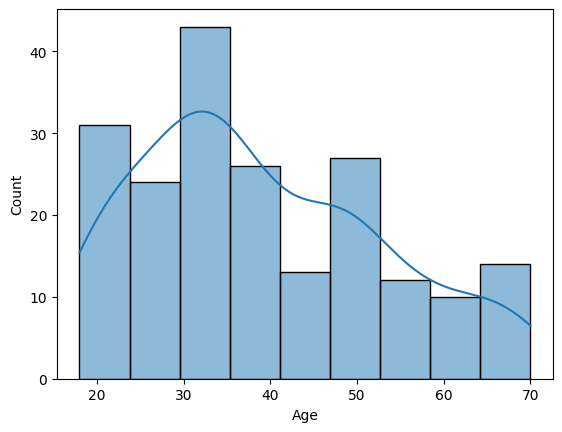

In [21]:
#basic univariate plots.
sns.histplot(x=df["Age"], kde="True");

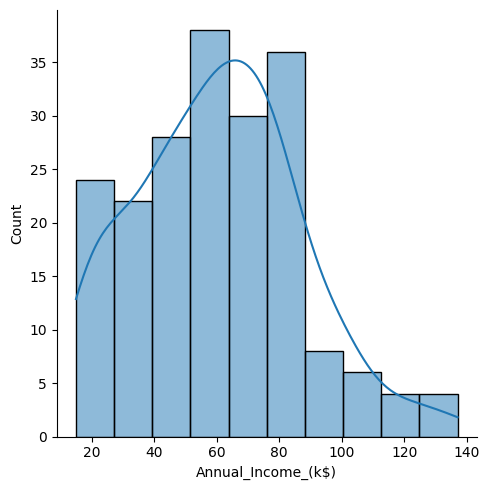

In [22]:
# same as above, different syntax.
sns.displot(x=df["Annual_Income_(k$)"], kde="True");

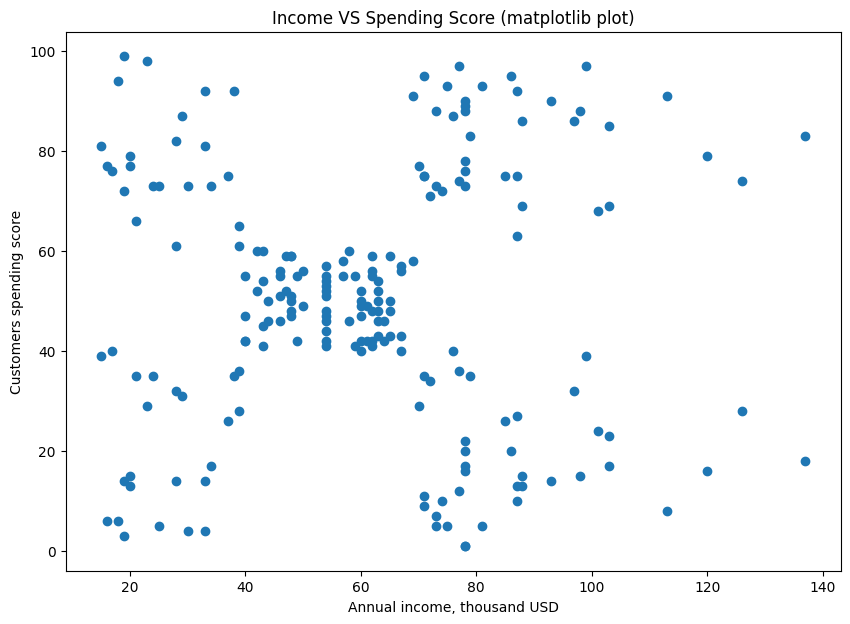

In [23]:
# simple, 'quick and dirty' plot for varibles and their relationships.
# each visualization library has slightly different "syntax" and "names".
# here we use matplotlib library and the scatter() function.
plt.figure(figsize=(10,7))
plt.scatter(x=df["Annual_Income_(k$)"], y=df["Spending_Score"]
           )


plt.title("Income VS Spending Score (matplotlib plot)");
plt.ylabel("Customers spending score");
plt.xlabel("Annual income, thousand USD");

We can see 5 or 7 clusters from this plot.

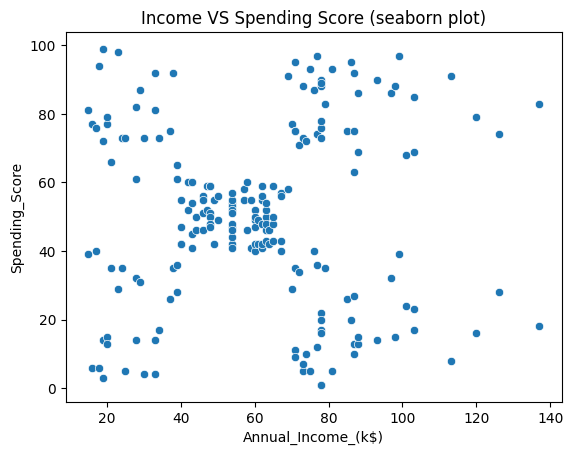

In [24]:
# each visualization library has slightly different "syntax" and "names".
# here we use seaborn library and the scatterplot() function.
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score",
                data=df).set(title="Income VS Spending Score (seaborn plot)");

In [25]:
# each visualization library has slightly different "syntax" and "names".
# here we use plotly express library and the scatter() function.
px.scatter(df, x="Annual_Income_(k$)", y="Spending_Score",
           height=500, width=700,
           title="Income versus spending score, plotly plot")

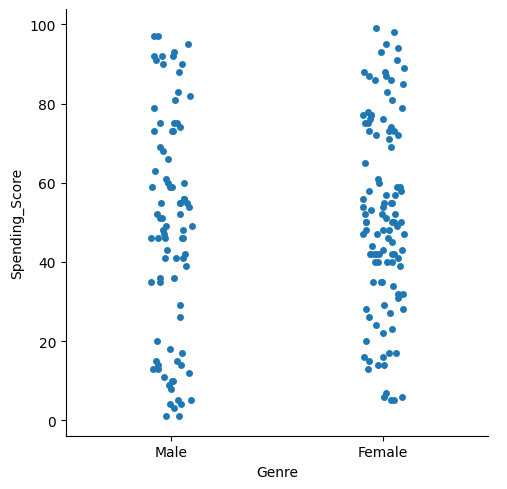

In [26]:
# plot categorical variable with numerical variable.
sns.catplot(x="Genre", y="Spending_Score", data=df);
# not an informative plot for these variables.

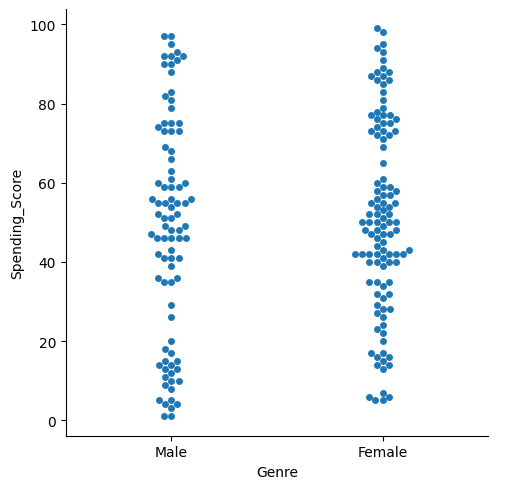

In [27]:
# same as above, different syntax.
sns.catplot(x="Genre", y="Spending_Score", data=df, kind="swarm");
# not an informative plot for these variables.

In [28]:
# same as above, different syntax
# different default values for figure size and spines.
#sns.swarmplot(x="Genre", y="Spending_Score", data=df);
# not an informative plot for these variables.

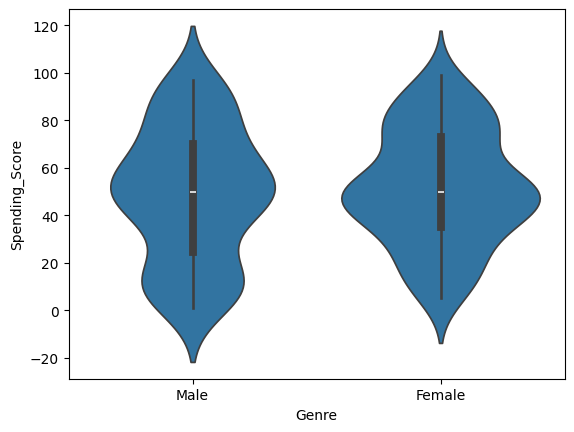

In [29]:
sns.violinplot(x="Genre", y="Spending_Score", data=df);
# not very informative plot for these variables.
# But, we see more observations of type female towards the median.

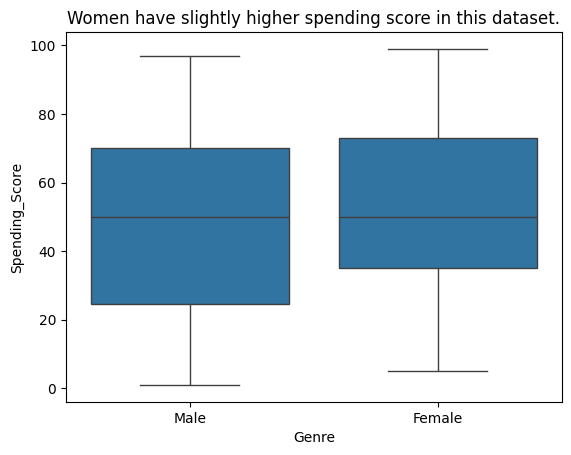

In [30]:
sns.boxplot(x="Genre", y="Spending_Score",
            data=df).set(
    title="Women have slightly higher spending score in this dataset.");

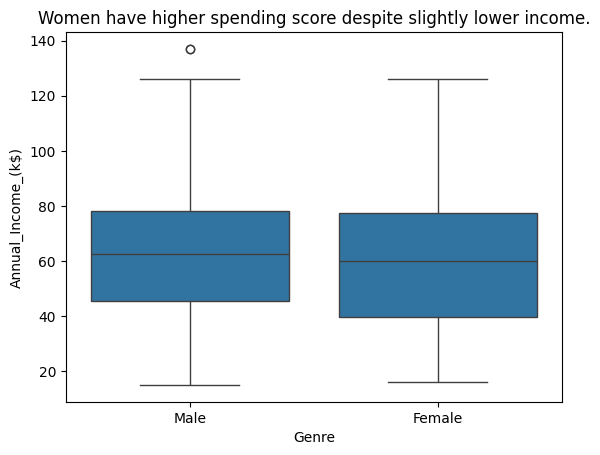

In [31]:
sns.boxplot(x="Genre", y="Annual_Income_(k$)",
            data=df).set(
    title="Women have higher spending score despite slightly lower income.");

In [32]:
# not a big difference it seems, but plots are not good enough for small differences.
px.scatter(df, x="Annual_Income_(k$)", y="Spending_Score",
           facet_col="Genre", color="Genre", height=400, width=800)

#### Simple descriptive stats on the mean and median of the two genders also shows preliminary evidence of only a small difference.   
Plots are not good enough for small differences.

In [33]:
# show mean income by gender. Female average income is lower.
df.groupby('Genre', as_index=False)['Annual_Income_(k$)'].mean()

,Genre,Annual_Income_(k$)
0,Female,59.250000
1,Male,62.227273


In [34]:
# show mean income and spending score by gender
df.groupby('Genre')[['Annual_Income_(k$)', 'Spending_Score']].mean()

,Annual_Income_(k$),Spending_Score
Genre,,
Female,59.250000,51.526786
Male,62.227273,48.511364


In [35]:
# show median of income and spending score by gender
df.groupby('Genre')[['Annual_Income_(k$)', 'Spending_Score']].median()

,Annual_Income_(k$),Spending_Score
Genre,,
Female,60.0,50.0
Male,62.5,50.0


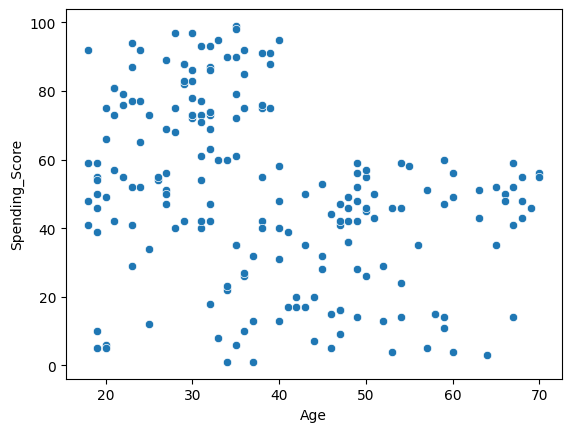

In [36]:
# plot Age and Score.
sns.scatterplot(x="Age", y="Spending_Score", data=df);
# No one above 40 years old has spending score > 60

In [37]:
# plot Age and Score and add some color to your gender life.
px.scatter(df, x="Age", y="Spending_Score", color="Genre",
           height=500, width=700)

No one above 40 years old has spending score > 60.  
Very few customers below 30 years old have low spending score < 40.  
The highest spending scores appear to be also a matter of age and not olny a matter of income.   
This is the first tutorial that shows this (conclusion after reading dozens of tutorials on kaggle).

In [38]:
# each visualization library has slightly different "syntax" and "names".
# here we use plotly express library and the scatter() function.
#see how to use tight layout margins.
px.scatter(df, x="Age", y="Annual_Income_(k$)",
           height=400, width=600,
          title="Age versus Income"
          ).update_layout(margin=dict(t=35, l=15, r=15, b=15))

In [39]:
px.scatter(df, x="Age", y="Annual_Income_(k$)", color="Genre",
           height=400, width=600,
          title="Age versus Income, by Gender"
          ).update_layout(margin=dict(t=35, l=15, r=15, b=15))

The plots above confirm that there are no customers aged 20 to 27 with income above 90. Still, there are many in this age bin with the highest spending scores.

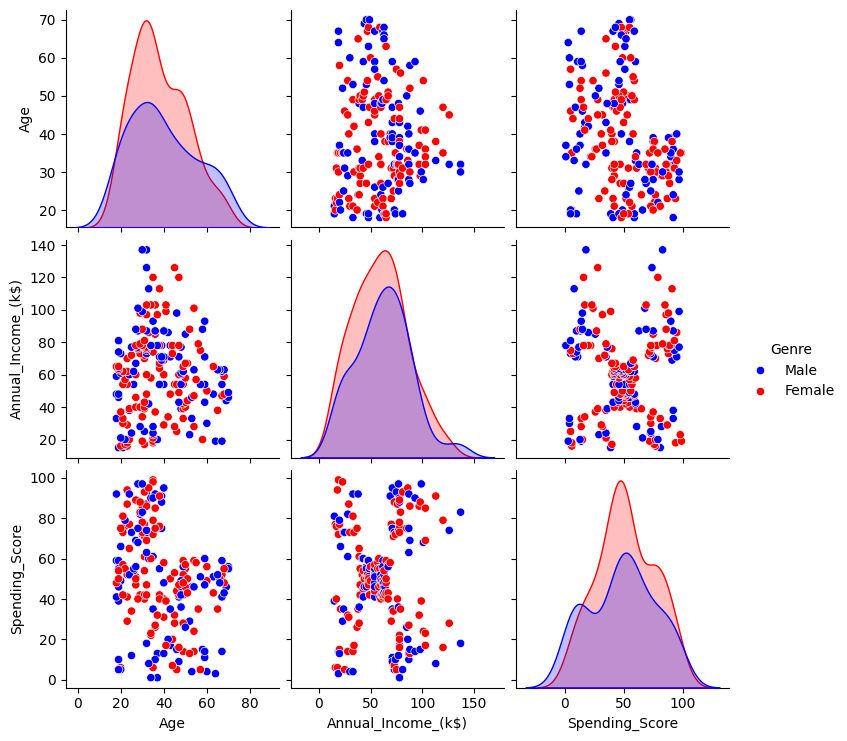

In [40]:
sns.pairplot(data=df, hue='Genre', palette=['Blue', 'Red']);

The plot above shows a bit higher spending score for women.  
The higher distribution peaks for female are there because there are more "female" observations.    
The distribution of spending score for women is a bit shifted to the right (bottom right plot). But, that difference is again very small and might be only true only in this small dataset.

In [41]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=False, shared_yaxes=True)

fig.append_trace(go.Box(y=df[df['Genre']=='Male']['Spending_Score'],
                        name='Male', boxpoints='all'), row=1, col=1)

fig.append_trace(go.Box(y=df[df['Genre']=='Female']['Spending_Score'],
                        name='Female', boxpoints='all'), row=1, col=2)

fig.update_layout(title='Spending score for Men vs Women:',
                 plot_bgcolor='#fff',
                 yaxis=dict(showticklabels=False),
                 height=400, width=600,
                 ).update_layout(margin=dict(t=60, l=5, r=0, b=15))

fig.add_annotation(x=0.5, y=1.1, text='<b>Women have slightly higher spending score</b>',
                   xref='paper', yref='paper', showarrow=False)
fig.show()

### Plot 4 dimensions (4 features) on the 3D space.   
Try different views, angles, perspectives, zooms to see how the data points look like.
There are at least five clusters and the middle one appears more densely populated.

In [42]:
three_dim_fig = px.scatter_3d(
    df, x="Annual_Income_(k$)", y="Spending_Score", z="Age", color="Genre",
    height=700, width=700,
    color_discrete_map={"Male": "blue", "Female":"red"}
).update_layout(margin=dict(t=40, l=40, r=40, b=40)
               )#.update_scenes(xaxis_autorange="reversed")

three_dim_fig.show()

# save to file, use everywhere with a browser
three_dim_fig.write_html("three_dim_customers.html")  

#### This plot confirms that ALL the customers with low annual income and high spending score belong to a relatively young age, < 35 years old

### Write an EDA and Descriptive Stats summary about variables their relationships.
...  
...  
...  
...  


## 4. Apply KMeans clustering to the data
### 4.1. Apply KMeans using two variables (Income and Spending Score) and five clusters.

Note: For simplicity reasons, I do not split the data in train and test set.

In [43]:
# create a matrix (πίνακας) of two varibles.
X = df[['Annual_Income_(k$)', 'Spending_Score']]

In [44]:
# show first 3 lines of dataff
X.head(3)

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6


In [45]:
# call the Kmeans algo to initialize it, and customise it with 5 clusters
# set random_state to always generate the same results
model = KMeans(n_clusters=5, random_state=0)

In [46]:
# show what the above variable name has created
model

KMeans(n_clusters=5, random_state=0)

In [47]:
# fit the 5 clusters customized algorithm to the data.
fitted_kmeans = model.fit(X)

In [48]:
# create y_pred = assign each observation of X to a cluster
y_pred = fitted_kmeans.predict(X)

In [49]:
## all the commands above could be in one line:
y_pred = KMeans(n_clusters=5).fit_predict(X)

In [50]:
# show the clusters in which each observation has been assigned to
y_pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

#### Assign ("predict") a cluster for one or more new observations.

In [51]:
# predict the cluster of a new observation that has annual income 20 and spending score 50.
new_observation = [[20, 50]]
#prediction
new_observation_pred = fitted_kmeans.predict(new_observation)
# this belongs in the cluster with label 4
new_observation_pred

c:\Users\ppapa\OneDrive\Υπολογιστής\MSC\semester B\Python\venvs\.venv_pytorch\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([3], dtype=int32)

In [52]:
# Convert "new observation" to dataframe so that it has labels.
new_observation_as_a_df = pd.DataFrame(
    new_observation, columns=['Annual_Income_(k$)', 'Spending_Score'])

fitted_kmeans.predict(new_observation_as_a_df)

array([3], dtype=int32)

#### Show observations in clusters in a table.

In [53]:
# create a new column, add the column to the dataframe to show the cluster of each observation.
df["cluster"] = pd.DataFrame(y_pred, columns=["cluster"])

# set cluster column values as category data type
df["cluster"] = df["cluster"].astype('category')

#show first 6 rows of observations
df.head(10)

,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3
5,Female,22,17,76,2
6,Female,35,18,6,3
7,Female,23,18,94,2
8,Male,64,19,3,3
9,Female,30,19,72,2


In [54]:
# count number of observations in each cluster, sorted by number of observations
df['cluster'].value_counts()

cluster
0    81
1    39
4    35
3    23
2    22
Name: count, dtype: int64

In [55]:
# same as above, different syntax, output sorted by cluster number
# The FutureWarning means this will not work soon. Important to know this, that is why I leave the code as is.
df.groupby('cluster').size()

C:\Users\ppapa\AppData\Local\Temp\ipykernel_23368\4292413292.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cluster
0    81
1    39
2    22
3    23
4    35
dtype: int64

In [56]:
# Show average of variables my cluster
# This shows some basic descriptive stats about the clusters.
# e.g. cluster 3 has the highest spending score (82) with average income=82k and age=32
# e.g. cluster 0 has almost highest spending score (79) with average income only 26k and age=25
# This IMPORTANT finding confirms the previous insight about the importance of age.
df.iloc[:, 1:-1].mean()

Age                   38.85
Annual_Income_(k$)    60.56
Spending_Score        50.20
dtype: float64

In [57]:
df.iloc[:, 1:].groupby("cluster").mean()

C:\Users\ppapa\AppData\Local\Temp\ipykernel_23368\508859656.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age,Annual_Income_(k$),Spending_Score
cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


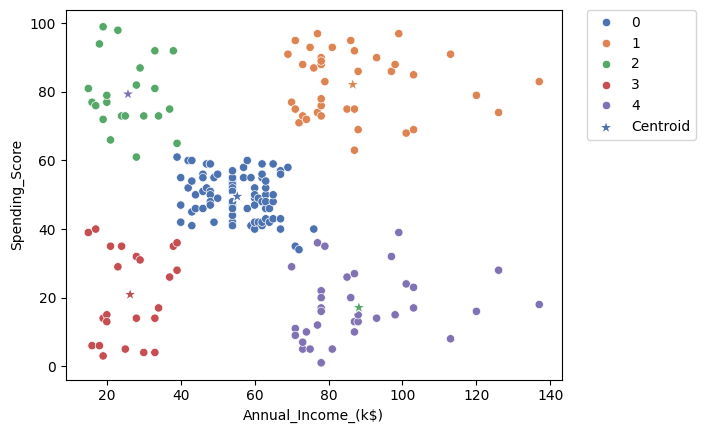

In [58]:
# plot the clusters with their centroids
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score", hue="cluster",
                data=df, palette="deep");

sns.scatterplot(x=fitted_kmeans.cluster_centers_[:, 0],
                y=fitted_kmeans.cluster_centers_[:, 1],
                s=100, c=sns.color_palette("deep", 5),
                label='Centroid', marker='*');

# Put the legend outside of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

In [59]:
# plot the five clusters in 3D space
three_dim_clusters = px.scatter_3d(
    df, x="Annual_Income_(k$)", y="Spending_Score", z="Age", color="cluster",
    height=600, width=600,
    color_discrete_map={0: "blue", 1:"purple", 2:"green", 3:"black", 4:"red"}
).update_layout(margin=dict(t=40, l=40, r=40, b=40))

three_dim_clusters.show()

# save to file, use everywhere with a browser
#three_dim_clusters.write_html("three_dim_customers.html")  

### 4.2. Use the elbow method to get a "suggestion" about the number of clusters.  
This should be done first, but for presentation and teaching purposes I wanted to show how kmeans is applied in scikit learn. Use all features.

In [60]:
df.columns

Index(['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score', 'cluster'], dtype='object')

In [61]:
# create the matrix of features X to use in algorithm
X = df[["Genre", "Age", "Annual_Income_(k$)", "Spending_Score"]]
# show first two rows.
X.head(2)

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81


### 4.2.1 Encoding categorical feature to "dummy" feature

In [62]:
# encode Male and Female to zero and one, to use this feature in the Kmeans algo
# create a new column named Gender and set Male = 1, Female=0
X["Gender"] = pd.get_dummies(X.Genre, drop_first=True, prefix="Genre")
X.head(3)

,Genre,Age,Annual_Income_(k$),Spending_Score,Gender
0,Male,19,15,39,True
1,Male,21,15,81,True
2,Female,20,16,6,False


In [63]:
# drop the Genre column from X. WE now have the Gender column.
X = X.drop("Genre", axis=1)
# show first 3 rows
X.head(3)

,Age,Annual_Income_(k$),Spending_Score,Gender
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False


### Apply Kmeans with four features and 1 to 15 clusters, to demonstreate the elbow method.   
Look at the "elbow". The point in which you get not much more valuable info by having more clusters.

In [64]:
# empty list to contain the score of each cluster.
clustering_score = []

# Loop 15 times.
# Create and fit 15 models.
# Get the inertia score for 15 models, from 1 cluster to 15.
for clusters_number in range(1, 15):
    # initiate and customize algo
    model = KMeans(n_clusters=clusters_number, random_state=0)
    # fit algo to the data
    model.fit(X)
    # inertia_ = Sum of squared distances of samples to their closest cluster center.
    # this is the Within Clusters Sum of Squares metric, WCSS
    clustering_score.append(model.inertia_)

In [65]:
# show the list with the clusters' score from 1 to 10
clustering_score

[308862.05999999994,
 212889.44245524297,
 143391.5923603568,
 105299.98742210325,
 82657.05476706792,
 58387.211042939205,
 52544.81463287702,
 44389.80767355768,
 40670.98996236322,
 37201.52704476877,
 35360.07987012987,
 33108.38629148629,
 31667.761291486295,
 30472.52296176046]

In [66]:
# WCSS score for 1 cluster
clustering_score[0]  # first item in the list

308862.05999999994

In [67]:
# WCSS score for 2 clusters
clustering_score[1]  # second item in the list

212889.44245524297

In [68]:
# show the cluster score for the fifth element (5 clusters)
clustering_score[4]

82657.05476706792

In [69]:
# creata pandas dataframe from list of clustering WCSS score
wcss_df = pd.DataFrame({'clusters_score':clustering_score})

In [70]:
# creata new column of dataframe from range of clusters
wcss_df["clusters_number"] = pd.Series(range(1,11))

In [71]:
#show clusters score for number of clusters
wcss_df

,clusters_score,clusters_number
0,308862.060000,1.0
1,212889.442455,2.0
2,143391.592360,3.0
3,105299.987422,4.0
4,82657.054767,5.0
5,58387.211043,6.0
6,52544.814633,7.0
7,44389.807674,8.0
8,40670.989962,9.0
9,37201.527045,10.0


We see that from 4 to five clusters there is a large reduction in WCSS, but from 5 to 6 there is a reduction from 58348 to 51132, much smaller. The reduction in WCSS from 6 to 7 clusters is similar.
There is a much smaller reduction from 7 to 8 clusters.

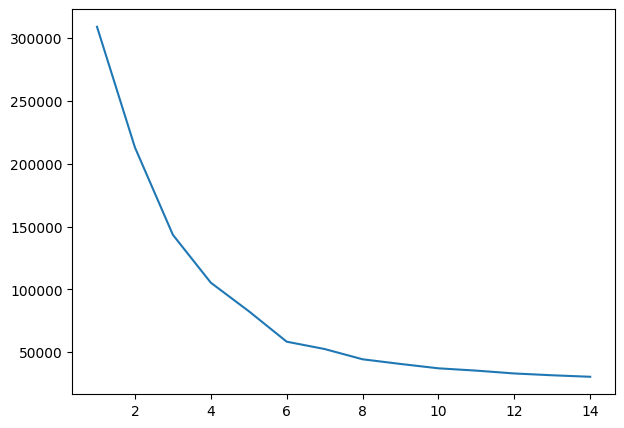

In [72]:
plt.figure(figsize=(7,5))

#plot the simple range from 1 to 10 on x and the clustering score on y.
plt.plot(range(1, 15), clustering_score);

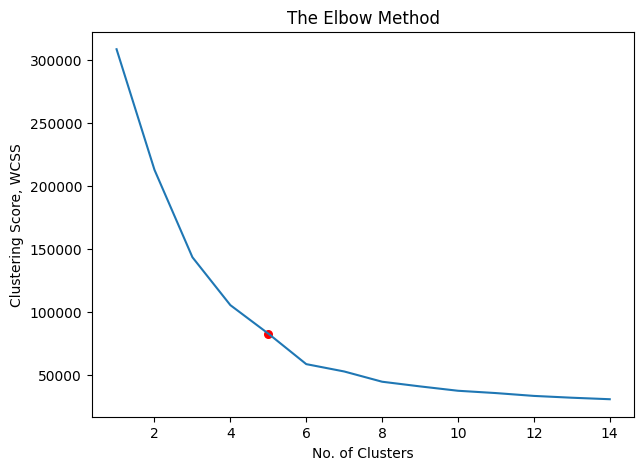

In [73]:
# plot WCSS
# create a figure and set size
plt.figure(figsize=(7,5))

#plot the simple range from 1 to 10 on x and the clustering score on y.
plt.plot(range(1, 15), clustering_score)

#plot a red o on number 5 on x axis, and the WCSS score 
plt.scatter(5, clustering_score[4], s = 30, c = 'red', marker='o')

# add title and labels
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score, WCSS');

We also see that the slope of the curve from 5 to 6 clusters is reduced but very slightly. This suggests five clusters are a good choice.
But using four features instead of two suggest that 6 cluster might also be a good choice.

### 4.3. Apply silhouette method to get a suggestion for the number of clusters.  
scikit-learn silhouette score [function and examples.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

For a more advanced reading on silhouette score you may read this [tutorial.](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)   

For more advanced clustering performace evaluation methods, you may read this [guide.](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

In [74]:
#create empty list to store score
silhouette_scores_list = []

# loop from 2 to 10 clusters:
for clusters_number in range(2, 15):  # Silhouette starts from 2 clusters.
    # initiate and customize algo
    model = KMeans(n_clusters=clusters_number, random_state=0)
    # fit algo to the data
    clusters = model.fit_predict(X)
    # calculate silhouette score for each number of clusters
    silhouette_metric_score = silhouette_score(X, clusters)
    # append each score to the list
    silhouette_scores_list.append(silhouette_metric_score)
    print(
        f"For clusters={clusters_number}, the average silhouette_score is: {silhouette_metric_score}")

For clusters=2, the average silhouette_score is: 0.29307334005502633
For clusters=3, the average silhouette_score is: 0.383798873822341
For clusters=4, the average silhouette_score is: 0.3921703094115865
For clusters=5, the average silhouette_score is: 0.37688936241822546
For clusters=6, the average silhouette_score is: 0.4506609653808789
For clusters=7, the average silhouette_score is: 0.44296270060494874
For clusters=8, the average silhouette_score is: 0.425945425758392
For clusters=9, the average silhouette_score is: 0.4116310808490313
For clusters=10, the average silhouette_score is: 0.381660187556178
For clusters=11, the average silhouette_score is: 0.36033505379654224
For clusters=12, the average silhouette_score is: 0.34759845392414923
For clusters=13, the average silhouette_score is: 0.3441300920503319
For clusters=14, the average silhouette_score is: 0.339298825170399


In [75]:
# The percentage difference for silhouette score for 6 versus five clusters
((0.45-0.376)/0.376) * 100

19.68085106382979

We get a higher average silhouette score for 6 clusters. By a significant 20% difference.


### 4.4. Apply KMeans with four features and six clusters

In [76]:
# our data until now, grouped in 5 clusters
df.head(3)

,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3


In [77]:
#show the features matrix
X.head(3)
# remember we have encoded "Genre" as "Gender".

,Age,Annual_Income_(k$),Spending_Score,Gender
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False


In [78]:
model = KMeans(n_clusters=6, random_state=0)
# fit algo to the data
six_clusters_fit = model.fit(X)
six_clusters_kmeans = model.fit_predict(X)

In [79]:
six_clusters_kmeans

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5,
       2, 5, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [80]:
# create a new column, add it to the dataframe to show cluster sof observations.
df["six_clusters"] = pd.DataFrame(
    six_clusters_kmeans, columns=["six_clusters"])

# set six clusters column values as category data type
df["six_clusters"] = df["six_clusters"].astype('category')

In [81]:
# show first 4 rows
df.head(4)

,Genre,Age,Annual_Income_(k$),Spending_Score,cluster,six_clusters
0,Male,19,15,39,3,2
1,Male,21,15,81,2,5
2,Female,20,16,6,3,2
3,Female,23,16,77,2,5


In [82]:
# plot the six clusters in the 3D space
three_dim_six_clusters = px.scatter_3d(
    df, x="Annual_Income_(k$)", y="Spending_Score", z="Age",
    color="six_clusters", height=800, width=800,
    color_discrete_map={
        0: "blue", 1:"purple", 2:"green", 3:"black", 4:"red", 5:"brown"},
    size='Annual_Income_(k$)'
).update_layout(margin=dict(t=50, l=60, r=60, b=40))

three_dim_six_clusters.show()

# save to file, use everywhere with a browser
#three_dim_clusters.write_html("three_dim_customers.html")  

Examining the data, we see that the customers with spending score 40 to 60 have been devided to two clusters, based on their age.    
The new cluster mainly contains customers above 40+ with high spending score. It is designated as cluster 1 in this case, and this the larger cluster.  

**Important reminder: After all, the number of clusters is also a matter of policy decisions.**

## 5. Define, desribe and label clusters after examining them one by one.

In [83]:
# plot one of the six clusters, cluster "zero" in the 3D space to examine it
plot_cluster_zero = px.scatter_3d(
    df[df["six_clusters"] == 0],  # Just change the dataframe to filter out all other clusters
    x="Annual_Income_(k$)", y="Spending_Score", z="Age",
    color="six_clusters", height=800, width=800,
    color_discrete_map={
        0: "blue", 1:"purple", 2:"green", 3:"black", 4:"red", 5:"brown"},
    # size='Annual_Income_(k$)'  # Not needed because I don't compare it with aothe clusters.
).update_layout(margin=dict(t=50, l=60, r=60, b=40))

plot_cluster_zero.show()

In [84]:
# show basic descriptive stats for cluster labeled as 0.
df[df["six_clusters"] == 0].describe()

,Age,Annual_Income_(k$),Spending_Score
count,44.000000,44.000000,44.000000
mean,56.340909,53.704545,49.386364
std,8.550651,8.239382,5.993081
min,43.000000,38.000000,35.000000
25%,49.000000,47.000000,45.750000
50%,54.000000,54.000000,49.000000
75%,65.250000,62.000000,55.000000
max,70.000000,67.000000,60.000000


**How would you describe, define this "cluster 0" in a few words? How would you "label" it in one or two words to remember it?**     
How is this cluster different from others?    
I define it as: "45ers and above, with average income and average spending relative to their income".  
And label them as: "wise_constrained", implyting that they are wise because they spend according to their budget constraint, and are also wise "age-wise".

In [85]:
# plot out of the six clusters, cluster "one" in the 3D space to examine it
plot_cluster_one = px.scatter_3d(
    df[df["six_clusters"] == 1],  # Just change the dataframe to filter out all other clusters
    x="Annual_Income_(k$)", y="Spending_Score", z="Age",
    color="six_clusters", height=800, width=800,
    color_discrete_map={
        0: "blue", 1:"purple", 2:"green", 3:"black", 4:"red", 5:"brown"},
    # size='Annual_Income_(k$)'  # Not needed because I don't compare it with aothe clusters.
).update_layout(margin=dict(t=50, l=60, r=60, b=40))

plot_cluster_one.show()

In [86]:
# statistically describe the observations that belong to cluster 1.
df[df["six_clusters"] == 1].describe()

,Age,Annual_Income_(k$),Spending_Score
count,39.000000,39.000000,39.000000
mean,32.692308,86.538462,82.128205
std,3.728650,16.312485,9.364489
min,27.000000,69.000000,63.000000
25%,30.000000,75.500000,74.500000
50%,32.000000,79.000000,83.000000
75%,35.500000,95.000000,90.000000
max,40.000000,137.000000,97.000000


**How would you describe, define this "cluster one" in a few words? How would you "label" it in one or two words to remember it?**     
How is this cluster different from others?    
Let's see... hmmm ... Age 27 to 40, high to very high income, very high spending score.   
I assume that perhaps they are postgraduates from BIS UoA that after ther masters started finally earning a nice salary and now they want to enjoy it before starting a family.  

I define this cluster as: "in their thirties, with a lot of cash and finally can spend a lot".  
And label them as: "start_earning_living_it", implyting that they enjoy spending now that they started earning it after working and studying hard for years.

In [87]:
# plot out of the six clusters, "cluster two" in the 3D space to examine it
plot_cluster_two = px.scatter_3d(
    df[df["six_clusters"] == 2],  # Just change the dataframe to filter out all other clusters
    x="Annual_Income_(k$)", y="Spending_Score", z="Age",
    color="six_clusters", height=800, width=800,
    color_discrete_map={
        0: "blue", 1:"purple", 2:"green", 3:"black", 4:"red", 5:"brown"},
    # size='Annual_Income_(k$)'  # Not needed because I don't compare it with aothe clusters.
).update_layout(margin=dict(t=50, l=60, r=60, b=40))

plot_cluster_two.show()

In [88]:
# statistically describe the observations that belong to cluster 2.
df[df["six_clusters"] == 2].describe()

,Age,Annual_Income_(k$),Spending_Score
count,22.000000,22.000000,22.000000
mean,44.318182,25.772727,20.272727
std,12.800247,7.646548,12.947446
min,19.000000,15.000000,3.000000
25%,35.250000,19.250000,7.750000
50%,45.500000,24.500000,16.000000
75%,52.750000,32.250000,31.750000
max,67.000000,39.000000,40.000000


**How would you describe, define this "cluster two" in a few words? How would you "label" it in one or two words to remember it?**     
How is this cluster different from others?    
Let's see... hmmm ... all ages, very low income, very low spending score.   
 
I would label them as: "have_not_spend_not", implying that they don't spend a lot because they don't have a lot.

In [89]:
# statistically describe the observations that belong to cluster 3.
df[df["six_clusters"] == 3].describe()

,Age,Annual_Income_(k$),Spending_Score
count,34.000000,34.000000,34.000000
mean,41.647059,88.735294,16.764706
std,11.058748,16.332360,9.881292
min,19.000000,71.000000,1.000000
25%,34.500000,78.000000,10.000000
50%,42.500000,85.500000,15.500000
75%,47.750000,97.750000,22.750000
max,59.000000,137.000000,39.000000


**How would you describe, define this "cluster three" in a few words? How would you "label" it in one or two words to remember it?**     
How is this cluster different from others?    
Let's see... hmmm ... all ages, high to very income, low to very low spending score.   
 
I would label them as: "savers_or_spend_elsewhere", implying that they don't spend a lot because they save it, or they don't spend it at the Mall.

In [90]:
# statistically describe the observations that belong to cluster 4.
df[df["six_clusters"] == 4].describe()

,Age,Annual_Income_(k$),Spending_Score
count,38.000000,38.000000,38.000000
mean,27.315789,57.500000,48.447368
std,7.472853,9.722501,7.924295
min,18.000000,40.000000,29.000000
25%,21.000000,49.500000,42.000000
50%,26.500000,60.000000,49.500000
75%,32.000000,64.000000,55.000000
max,43.000000,76.000000,60.000000


**How would you describe, define this "cluster four" in a few words? How would you "label" it in one or two words to remember it?**     
How is this cluster different from others?     
I would label them as: "young_cautious", implying that they don't spend a lot because of they are budget constrained, and tehy are young.  
This cluster differs to cluster zero mostly because of their age.

In [91]:
# statistically describe the observations that belong to cluster 5.
# Last of six clusters, index in python starts from zero.
df[df["six_clusters"] == 5].describe()

,Age,Annual_Income_(k$),Spending_Score
count,23.000000,23.000000,23.000000
mean,25.521739,26.304348,78.565217
std,5.273170,7.893811,10.953729
min,18.000000,15.000000,61.000000
25%,21.500000,19.500000,73.000000
50%,24.000000,25.000000,77.000000
75%,30.000000,33.000000,84.500000
max,35.000000,39.000000,99.000000


**How would you describe, define this "cluster five" in a few words? How would you "label" it in one or two words to remember it?**     
How is this cluster different from others?     
Yound age, max age is 35, low income, high to super high spending score
I would label them as: "young_yolos", implying that they don't spend it all now that they are young, despite not having a lot. 

In [92]:
# Replace the cluster number with my labels to help me remember what the cluster groups might suggest.
my_funny_intuitite_cluster_labes = {0: "wise_constrained",
                                    1: "start_earning_living_it",
                                    2: "have_not_spend_not",
                                    3: "save_or_spend_elsewhere",
                                    4: "young_cautious",
                                    5: "young_yolos",
}

In [93]:
# Create new column assigning my labels according to cluster number.
df["six_clusters_labels"] = df["six_clusters"].map(my_funny_intuitite_cluster_labes)

In [94]:
# show first 10 rows of data
df.head(10)

,Genre,Age,Annual_Income_(k$),Spending_Score,cluster,six_clusters,six_clusters_labels
0,Male,19,15,39,3,2,have_not_spend_not
1,Male,21,15,81,2,5,young_yolos
2,Female,20,16,6,3,2,have_not_spend_not
3,Female,23,16,77,2,5,young_yolos
4,Female,31,17,40,3,2,have_not_spend_not
5,Female,22,17,76,2,5,young_yolos
6,Female,35,18,6,3,2,have_not_spend_not
7,Female,23,18,94,2,5,young_yolos
8,Male,64,19,3,3,2,have_not_spend_not
9,Female,30,19,72,2,5,young_yolos


**Notice the new cluster in the middle. It is only a matter of age.** 

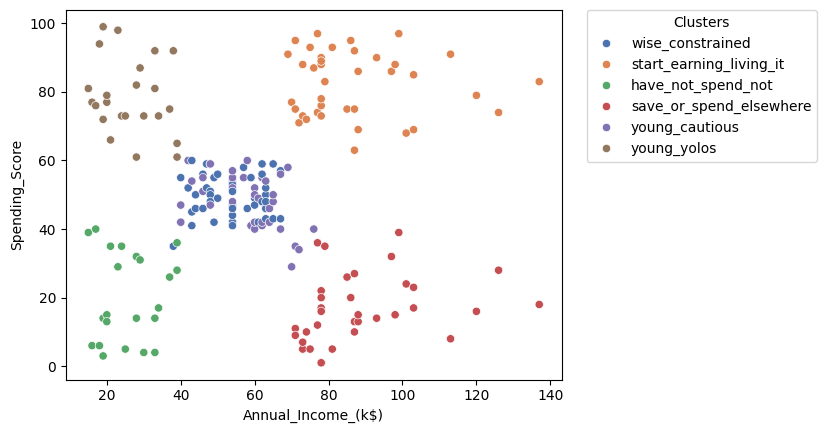

In [95]:
# 2D plot the six clusters, use as legend the new labels.

sns.scatterplot(
    x="Annual_Income_(k$)", y="Spending_Score", hue="six_clusters_labels",
    data=df, palette="deep");

# also add cluster numbers next to text in the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title="Clusters");   


In [96]:
# 3D plot the six clusters, use as legend the new labels.
three_dim_six_clusters_labels = px.scatter_3d(
    df, x="Annual_Income_(k$)", y="Spending_Score", z="Age",
    color="six_clusters_labels", height=800, width=800,
    color_discrete_map={
        "wise_constrained": "blue", "start_earning_living_it":"purple",
        "have_not_spend_not":"green", "save_or_spend_elsewhere":"black",
        "young_cautious":"red", "young_yolos":"brown"},
    size='Annual_Income_(k$)'
).update_layout(margin=dict(t=50, l=60, r=60, b=40))

three_dim_six_clusters_labels.show()

In [97]:
# 3D plot three from the six cluster to compare them.
three_dim_six_clusters_labels = px.scatter_3d(
    df[(df["six_clusters_labels"] == "wise_constrained") |
       (df["six_clusters_labels"] == "start_earning_living_it") |
       (df["six_clusters_labels"] == "have_not_spend_not")],
    x="Annual_Income_(k$)", y="Spending_Score", z="Age",
    color="six_clusters_labels", height=800, width=800,
    color_discrete_map={
        "wise_constrained": "blue", "start_earning_living_it":"purple",
        "have_not_spend_not":"green"},
    size='Annual_Income_(k$)'
).update_layout(margin=dict(t=50, l=60, r=60, b=40))

three_dim_six_clusters_labels.show()

In [98]:
# show clusters by size
# Mind the FutureWarning, this will not work soon.
df.groupby('six_clusters').size()

C:\Users\ppapa\AppData\Local\Temp\ipykernel_23368\633397639.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



six_clusters
0    44
1    39
2    22
3    34
4    38
5    23
dtype: int64

In [99]:
# group cluster labeled as 1, by gender and show size
df[df["six_clusters"] == 1].groupby("Genre").size()

Genre
Female    21
Male      18
dtype: int64

## 6. Model pereformance evaluation in clustering.  
[Scikit-learn model evaluation and metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions)   
[Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)   
If there are no labels indeed use:   
[Silhouette Coefficient](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)  
[Calinski-Harabasz index](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

## 7. Extra reading about clustering and unsupervised learning.
“Give a man a fish and you feed him for a day. Teach him how to fish and you feed him for a lifetime”, quote from the Chinese philosopher Lao Tzu, founder of Taoism.  

How to destroy a proverb, by Thanasis Argyriou:  

“Give a student a coding script and you solve his problems for an exam. Teach him how to use chatGPT, how to use GitHub copilot and how to google search and copy-paste and you ***might*** solve his problems for a lifetime of learning and asking again and again.”    
Learning Programming is literally "I grow old always learning a lot".  

[Unsupervised learning algorithms in scikit learn.](https://scikit-learn.org/stable/unsupervised_learning.html)    
Clustering is a small subset of unsupervised learning.     
[Clustering algorithms in scikit learn.](https://scikit-learn.org/stable/modules/clustering.html#)